**Project 2**

> *"Exploring Recurrent Neural Network Architectures: Implementation and Comparison of Basic, Stacked, Bi-Directional, and Hybrid Models for Sequence Modeling"*



Importing Necessary libraries

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Setting random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


Using IBM dataset for this project

In [21]:
# Loading IMDB dataset
max_features = 10000  # Only considering the top 10,000 words
max_len = 500  # Maximum sequence length
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform input size
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)


Building Basic RNN model:

In [22]:
# Build RNN model
# Define the input shape
input_shape = (max_len,)

# Create the model
model = Sequential()
from tensorflow.keras.layers import Input
model.add(Input(shape=input_shape))  # Add an Input layer with the specified shape
model.add(Embedding(max_features, 32, input_length=max_len))
model.add(SimpleRNN(32))  # Simple RNN layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 500, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 322,113 (1.23 MB)

 Trainable params: 322,113 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 35s 212ms/step - accuracy: 0.5260 - loss: 0.6907 - val_accuracy: 0.6000 - val_loss: 0.6604
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 228ms/step - accuracy: 0.7421 - loss: 0.5692 - val_accuracy: 0.6730 - val_loss: 0.5993
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 227ms/step - accuracy: 0.8654 - loss: 0.3501 - val_accuracy: 0.8020 - val_loss: 0.4553
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 207ms/step - accuracy: 0.9526 - loss: 0.1487 - val_accuracy: 0.8096 - val_loss: 0.4970
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 200ms/step - accuracy: 0.9852 - loss: 0.0638 - val_accuracy: 0.7638 - val_loss: 0.6232
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 196ms/step - accuracy: 0.9874 - loss: 0.0520 - val_accuracy: 0.7576 - val_loss: 0.6897
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 46s 230ms/step - accuracy: 0.9944 - loss: 0.0278 - val_accuracy: 0.7494 - val_loss: 0.7491
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 205ms/step - accuracy: 0.9983 - loss: 0

In [25]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7650 - loss: 0.8231
Test Accuracy: 0.7678800225257874


**Stacking RNN LAyers and Bi-Directional RNNs:**

*1) Stacked RNN Model:*

In [34]:
# Build a Stacked RNN model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten

# Define the input shape
input_shape = (max_len,)

# Create the model
stacked_rnn_model = Sequential()
stacked_rnn_model.add(Input(shape=input_shape))  # Add an Input layer with the specified shape
stacked_rnn_model.add(Embedding(max_features, 32, input_length=max_len))
stacked_rnn_model.add(SimpleRNN(32, return_sequences=True))  # First RNN layer
stacked_rnn_model.add(SimpleRNN(32, return_sequences=True))  # Second RNN layer
stacked_rnn_model.add(Flatten())  # Add a Flatten layer to flatten the output
stacked_rnn_model.add(Dense(1, activation='sigmoid'))

In [35]:
stacked_rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
stacked_rnn_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ (None, 500, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_14 (SimpleRNN)            │ (None, 500, 32)             │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_15 (SimpleRNN)            │ (None, 500, 32)             │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │          16,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 340,161 (1.30 MB)

 Trainable params: 340,161 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Train the stacked RNN model
stacked_rnn_history = stacked_rnn_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 67s 401ms/step - accuracy: 0.5882 - loss: 0.6536 - val_accuracy: 0.8666 - val_loss: 0.3233
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 85s 420ms/step - accuracy: 0.8890 - loss: 0.2658 - val_accuracy: 0.8676 - val_loss: 0.3369
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 86s 445ms/step - accuracy: 0.9448 - loss: 0.1454 - val_accuracy: 0.7994 - val_loss: 0.6151
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 64s 409ms/step - accuracy: 0.9647 - loss: 0.0949 - val_accuracy: 0.8192 - val_loss: 0.4880
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 67s 425ms/step - accuracy: 0.9866 - loss: 0.0394 - val_accuracy: 0.8014 - val_loss: 0.6810
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 416ms/step - accuracy: 0.9923 - loss: 0.0243 - val_accuracy: 0.8492 - val_loss: 0.7015
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 68s 430ms/step - accuracy: 0.9982 - loss: 0.0071 - val_accuracy: 0.8536 - val_loss: 0.7815
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 429ms/step - accuracy: 0.9998 - loss: 0

In [37]:
# Evaluate stacked RNN model
stacked_test_loss, stacked_test_acc = stacked_rnn_model.evaluate(x_test, y_test)
print(f"Stacked RNN Test Accuracy: {stacked_test_acc}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 70ms/step - accuracy: 0.8432 - loss: 0.9058
Stacked RNN Test Accuracy: 0.8432400226593018


*2) Bi-Directional RNN Model:*

In [40]:
from tensorflow.keras.layers import Input, Embedding, Bidirectional, Dense

# Define the input shape
input_shape = (max_len,)

# Build a Bi-directional RNN model
bi_rnn_model = Sequential()
bi_rnn_model.add(Embedding(max_features, 32, input_length=max_len, input_shape=input_shape))  # Specify input shape
bi_rnn_model.add(Bidirectional(SimpleRNN(32)))  # Bi-directional RNN layer
bi_rnn_model.add(Dense(1, activation='sigmoid'))

In [41]:
bi_rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
bi_rnn_model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)             │ (None, 500, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 324,225 (1.24 MB)

 Trainable params: 324,225 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# Train the bi-directional RNN model
bi_rnn_history = bi_rnn_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 61s 386ms/step - accuracy: 0.5216 - loss: 0.6974 - val_accuracy: 0.5712 - val_loss: 0.6814
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 80s 375ms/step - accuracy: 0.6748 - loss: 0.6319 - val_accuracy: 0.6606 - val_loss: 0.6138
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 59s 377ms/step - accuracy: 0.7785 - loss: 0.4942 - val_accuracy: 0.8068 - val_loss: 0.4384
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 60s 382ms/step - accuracy: 0.8970 - loss: 0.2677 - val_accuracy: 0.8096 - val_loss: 0.4497
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 63s 402ms/step - accuracy: 0.9493 - loss: 0.1522 - val_accuracy: 0.7966 - val_loss: 0.5174
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 58s 369ms/step - accuracy: 0.9715 - loss: 0.0976 - val_accuracy: 0.8002 - val_loss: 0.5441
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 364ms/step - accuracy: 0.9817 - loss: 0.0664 - val_accuracy: 0.8116 - val_loss: 0.6259
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 370ms/step - accuracy: 0.9838 - loss: 0

In [44]:
# Evaluate bi-directional RNN model
bi_test_loss, bi_test_acc = bi_rnn_model.evaluate(x_test, y_test)
print(f"Bi-directional RNN Test Accuracy: {bi_test_acc}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.7796 - loss: 0.7506
Bi-directional RNN Test Accuracy: 0.7807199954986572


**CNN-RNN Hybrid Model:**

In [47]:
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, SimpleRNN, Dense

# Define the input shape
input_shape = (max_len,)

# Build a CNN-RNN Hybrid model
cnn_rnn_model = Sequential()
cnn_rnn_model.add(Embedding(max_features, 32, input_length=max_len, input_shape=input_shape))  # Specify input shape
cnn_rnn_model.add(Conv1D(32, 3, activation='relu'))
cnn_rnn_model.add(MaxPooling1D(pool_size=2))
cnn_rnn_model.add(SimpleRNN(32))
cnn_rnn_model.add(Dense(1, activation='sigmoid'))

In [48]:
cnn_rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_rnn_model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)             │ (None, 500, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 498, 32)             │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 249, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_19 (SimpleRNN)            │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 325,217 (1.24 MB)

 Trainable params: 325,217 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Train the CNN-RNN hybrid model
cnn_rnn_history = cnn_rnn_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 203ms/step - accuracy: 0.5701 - loss: 0.6802 - val_accuracy: 0.6524 - val_loss: 0.6503
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 203ms/step - accuracy: 0.8089 - loss: 0.4869 - val_accuracy: 0.7520 - val_loss: 0.5094
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 182ms/step - accuracy: 0.8732 - loss: 0.3145 - val_accuracy: 0.8004 - val_loss: 0.4500
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 174ms/step - accuracy: 0.9512 - loss: 0.1587 - val_accuracy: 0.8062 - val_loss: 0.4763
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 176ms/step - accuracy: 0.9663 - loss: 0.1084 - val_accuracy: 0.8160 - val_loss: 0.4902
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 172ms/step - accuracy: 0.9753 - loss: 0.0823 - val_accuracy: 0.8116 - val_loss: 0.5763
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 43s 187ms/step - accuracy: 0.9805 - loss: 0.0650 - val_accuracy: 0.7988 - val_loss: 0.7136
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 43s 198ms/step - accuracy: 0.9915 - loss: 0

In [51]:
# Evaluate CNN-RNN hybrid model
cnn_rnn_test_loss, cnn_rnn_test_acc = cnn_rnn_model.evaluate(x_test, y_test)
print(f"CNN-RNN Hybrid Test Accuracy: {cnn_rnn_test_acc}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.8017 - loss: 0.7467
CNN-RNN Hybrid Test Accuracy: 0.8044800162315369


**Visulisation for comparison:**

In [52]:
# Evaluate models on the test data
test_loss_basic, test_acc_basic = model.evaluate(x_test, y_test)
test_loss_stacked, test_acc_stacked = stacked_rnn_model.evaluate(x_test, y_test)
test_loss_bi, test_acc_bi = bi_rnn_model.evaluate(x_test, y_test)
test_loss_hybrid, test_acc_hybrid = cnn_rnn_model.evaluate(x_test, y_test)

# Store results for visualization
test_accuracies = [test_acc_basic, test_acc_stacked, test_acc_bi, test_acc_hybrid]
test_losses = [test_loss_basic, test_loss_stacked, test_loss_bi, test_loss_hybrid]
labels = ['Basic RNN', 'Stacked RNN', 'Bi-Directional RNN', 'CNN-RNN Hybrid']

782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.7650 - loss: 0.8231
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.8432 - loss: 0.9058
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.7796 - loss: 0.7506
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.8017 - loss: 0.7467


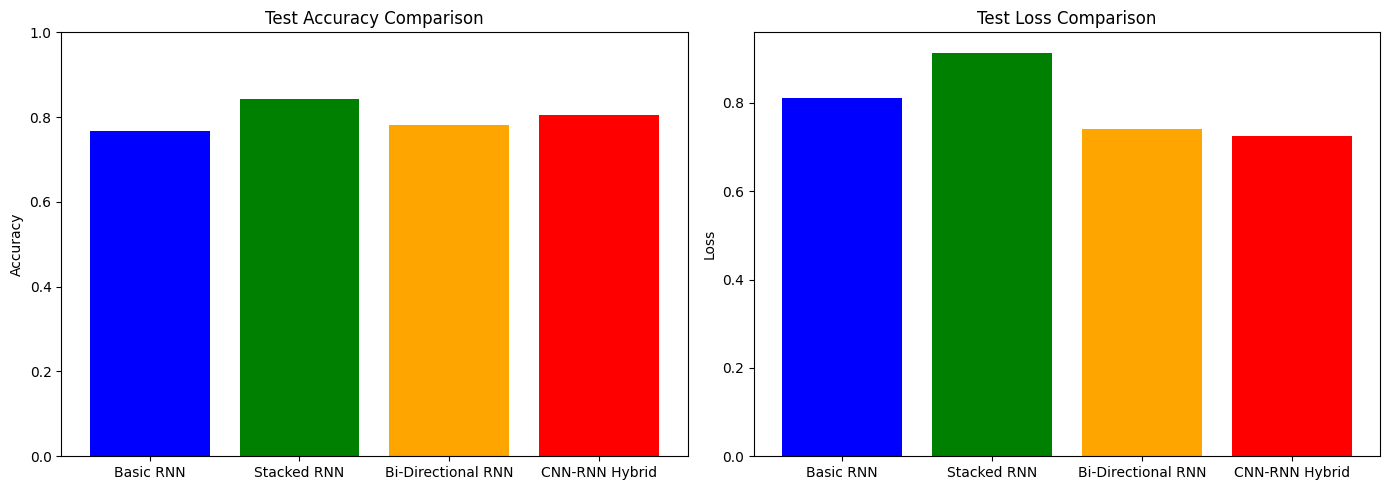

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot bar graphs for test accuracy and loss
def plot_test_performance(test_accuracies, test_losses, labels):
    x = np.arange(len(labels))

    # Plot test accuracy comparison
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.bar(x, test_accuracies, color=['blue', 'green', 'orange', 'red'])
    plt.xticks(x, labels)
    plt.ylim(0, 1)
    plt.title('Test Accuracy Comparison')
    plt.ylabel('Accuracy')

    # Plot test loss comparison
    plt.subplot(1, 2, 2)
    plt.bar(x, test_losses, color=['blue', 'green', 'orange', 'red'])
    plt.xticks(x, labels)
    plt.title('Test Loss Comparison')
    plt.ylabel('Loss')

    plt.tight_layout()
    plt.show()

# Call the function to visualize test performance
plot_test_performance(test_accuracies, test_losses, labels)
